# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [2]:
from sklearn.svm import SVC

# Loading Datasets

In [3]:
d= pd.read_csv('EDP_Dataset_1_1.csv')
d

,gender,age,w/s_hours,app_loss,bp_level,heart_rate,con_loss,less_interest,anxiety,feelin_down,sleep_pattern,thoughts,tired
0,M,20,3,1,2,2,3,3,3,3,3,3,3
1,F,20,1,0,1,1,0,0,0,0,0,0,1
2,F,21,2,1,1,2,1,2,1,1,2,1,1
3,M,21,1,0,1,0,1,1,0,1,1,0,2
4,F,20,2,1,2,2,2,2,2,2,2,2,2
5,M,21,0,0,1,2,0,0,0,0,0,0,0
6,M,20,1,1,1,2,1,1,0,1,2,1,2
7,F,21,2,1,0,1,2,2,2,2,3,3,2
8,M,21,3,1,1,2,2,1,1,1,2,1,1
9,F,19,3,1,1,0,1,1,0,1,2,0,2


In [4]:
d.shape

(20, 13)

In [5]:
f=pd.read_csv("EDP_Dataset_2_3.csv")

In [6]:
f.head()

,Timestamp,GENDER,AGE,Working / Studying hours,Are you experiencing Appetite loss?,Is your blood pressure normal?,Heart rate (increase in beats per second),Loss of Concentration,Little interest or pleasure in doing things,Are you experiencing anxiety attacks?,"Feeling down, depressed, or hopeless?","Trouble falling or staying asleep, or sleeping too much",Do you get thoughts of hurting yourself?,Feeling tired or having little energy?
0,6/1/2022 20:47:38,Male,20,6-8,Yes,Yes,Normal,2,2,0,2,0,0,2
1,6/1/2022 20:48:07,Male,20,4-6,No,Yes,Normal,0,3,0,0,3,0,0
2,6/1/2022 20:49:59,Male,20,6-8,No,Yes,Normal,2,2,2,1,2,2,2
3,6/1/2022 20:51:09,Female,20,8-10,No,Not sure,Normal,2,2,0,0,0,0,0
4,6/1/2022 20:52:17,Male,20,10+,Yes,Yes,Low,3,0,3,3,3,3,3


# Preprocessing the data

In [7]:
f.columns=['time','gender','age','w/s_hours','app_loss','bp_level','heart_rate','con_loss','less_interest','anxiety','feelin_down','sleep_pattern','thoughts','tired']
f

,time,gender,age,w/s_hours,app_loss,bp_level,heart_rate,con_loss,less_interest,anxiety,feelin_down,sleep_pattern,thoughts,tired
0,6/1/2022 20:47:38,Male,20,6-8,Yes,Yes,Normal,2,2,0,2,0,0,2
1,6/1/2022 20:48:07,Male,20,4-6,No,Yes,Normal,0,3,0,0,3,0,0
2,6/1/2022 20:49:59,Male,20,6-8,No,Yes,Normal,2,2,2,1,2,2,2
3,6/1/2022 20:51:09,Female,20,8-10,No,Not sure,Normal,2,2,0,0,0,0,0
4,6/1/2022 20:52:17,Male,20,10+,Yes,Yes,Low,3,0,3,3,3,3,3
5,6/1/2022 20:54:08,Male,21,6-8,Yes,No,Normal,3,3,1,3,3,3,3
6,6/1/2022 20:54:16,Female,20,6-8,No,Not sure,High,3,2,2,3,2,3,3
7,6/1/2022 21:00:58,Male,21,4-6,Yes,Yes,Normal,3,2,0,1,3,3,0
8,6/1/2022 21:01:10,Male,21,4-6,No,Yes,Normal,1,2,2,3,3,1,2
9,6/1/2022 21:05:39,Female,20,10+,Yes,Yes,Normal,2,3,1,2,1,0,2


In [8]:
f=f.drop(['time'], axis = 1)
f

,gender,age,w/s_hours,app_loss,bp_level,heart_rate,con_loss,less_interest,anxiety,feelin_down,sleep_pattern,thoughts,tired
0,Male,20,6-8,Yes,Yes,Normal,2,2,0,2,0,0,2
1,Male,20,4-6,No,Yes,Normal,0,3,0,0,3,0,0
2,Male,20,6-8,No,Yes,Normal,2,2,2,1,2,2,2
3,Female,20,8-10,No,Not sure,Normal,2,2,0,0,0,0,0
4,Male,20,10+,Yes,Yes,Low,3,0,3,3,3,3,3
5,Male,21,6-8,Yes,No,Normal,3,3,1,3,3,3,3
6,Female,20,6-8,No,Not sure,High,3,2,2,3,2,3,3
7,Male,21,4-6,Yes,Yes,Normal,3,2,0,1,3,3,0
8,Male,21,4-6,No,Yes,Normal,1,2,2,3,3,1,2
9,Female,20,10+,Yes,Yes,Normal,2,3,1,2,1,0,2


In [9]:
def find_gender(x):
    if "Male" in x:
        return "M"
    elif "Female" in x:
        return "F"
    else: 
        return x

In [10]:
f['gender']=f.gender.apply(find_gender)
f

,gender,age,w/s_hours,app_loss,bp_level,heart_rate,con_loss,less_interest,anxiety,feelin_down,sleep_pattern,thoughts,tired
0,M,20,6-8,Yes,Yes,Normal,2,2,0,2,0,0,2
1,M,20,4-6,No,Yes,Normal,0,3,0,0,3,0,0
2,M,20,6-8,No,Yes,Normal,2,2,2,1,2,2,2
3,F,20,8-10,No,Not sure,Normal,2,2,0,0,0,0,0
4,M,20,10+,Yes,Yes,Low,3,0,3,3,3,3,3
5,M,21,6-8,Yes,No,Normal,3,3,1,3,3,3,3
6,F,20,6-8,No,Not sure,High,3,2,2,3,2,3,3
7,M,21,4-6,Yes,Yes,Normal,3,2,0,1,3,3,0
8,M,21,4-6,No,Yes,Normal,1,2,2,3,3,1,2
9,F,20,10+,Yes,Yes,Normal,2,3,1,2,1,0,2


In [11]:
def find_hours(x):
    if "4-6" in x:
        return 0
    elif "6-8" in x:
        return 1
    elif "8-10" in x:
        return 2
    elif "10+" in x:
        return 3
    else:
        return x

In [12]:
f['w/s_hours']=f['w/s_hours'].apply(find_hours)
f

,gender,age,w/s_hours,app_loss,bp_level,heart_rate,con_loss,less_interest,anxiety,feelin_down,sleep_pattern,thoughts,tired
0,M,20,1,Yes,Yes,Normal,2,2,0,2,0,0,2
1,M,20,0,No,Yes,Normal,0,3,0,0,3,0,0
2,M,20,1,No,Yes,Normal,2,2,2,1,2,2,2
3,F,20,2,No,Not sure,Normal,2,2,0,0,0,0,0
4,M,20,3,Yes,Yes,Low,3,0,3,3,3,3,3
5,M,21,1,Yes,No,Normal,3,3,1,3,3,3,3
6,F,20,1,No,Not sure,High,3,2,2,3,2,3,3
7,M,21,0,Yes,Yes,Normal,3,2,0,1,3,3,0
8,M,21,0,No,Yes,Normal,1,2,2,3,3,1,2
9,F,20,3,Yes,Yes,Normal,2,3,1,2,1,0,2


In [13]:
def find_appetite(x):
    if "Yes" in x:
        return 1
    elif "No" in x:
        return 0
    else:
        return x

In [14]:
f['app_loss']=f['app_loss'].apply(find_appetite)
f

,gender,age,w/s_hours,app_loss,bp_level,heart_rate,con_loss,less_interest,anxiety,feelin_down,sleep_pattern,thoughts,tired
0,M,20,1,1,Yes,Normal,2,2,0,2,0,0,2
1,M,20,0,0,Yes,Normal,0,3,0,0,3,0,0
2,M,20,1,0,Yes,Normal,2,2,2,1,2,2,2
3,F,20,2,0,Not sure,Normal,2,2,0,0,0,0,0
4,M,20,3,1,Yes,Low,3,0,3,3,3,3,3
5,M,21,1,1,No,Normal,3,3,1,3,3,3,3
6,F,20,1,0,Not sure,High,3,2,2,3,2,3,3
7,M,21,0,1,Yes,Normal,3,2,0,1,3,3,0
8,M,21,0,0,Yes,Normal,1,2,2,3,3,1,2
9,F,20,3,1,Yes,Normal,2,3,1,2,1,0,2


In [15]:
def find_bp(x):
    if "Yes" in x:
        return 2
    elif "No" in x:
        return 1
    elif "Not Sure" in x: 
        return 0
    else:
        return x

In [16]:
f['bp_level']=f['bp_level'].apply(find_bp)
f

,gender,age,w/s_hours,app_loss,bp_level,heart_rate,con_loss,less_interest,anxiety,feelin_down,sleep_pattern,thoughts,tired
0,M,20,1,1,2,Normal,2,2,0,2,0,0,2
1,M,20,0,0,2,Normal,0,3,0,0,3,0,0
2,M,20,1,0,2,Normal,2,2,2,1,2,2,2
3,F,20,2,0,1,Normal,2,2,0,0,0,0,0
4,M,20,3,1,2,Low,3,0,3,3,3,3,3
5,M,21,1,1,1,Normal,3,3,1,3,3,3,3
6,F,20,1,0,1,High,3,2,2,3,2,3,3
7,M,21,0,1,2,Normal,3,2,0,1,3,3,0
8,M,21,0,0,2,Normal,1,2,2,3,3,1,2
9,F,20,3,1,2,Normal,2,3,1,2,1,0,2


In [17]:
def find_heart(x):
    if "High" in x:
        return 2
    elif "Normal" in x:
        return 1
    elif "Low" in x: 
        return 0
    else:
        return x

In [18]:
f['heart_rate']=f['heart_rate'].apply(find_heart)
f

,gender,age,w/s_hours,app_loss,bp_level,heart_rate,con_loss,less_interest,anxiety,feelin_down,sleep_pattern,thoughts,tired
0,M,20,1,1,2,1,2,2,0,2,0,0,2
1,M,20,0,0,2,1,0,3,0,0,3,0,0
2,M,20,1,0,2,1,2,2,2,1,2,2,2
3,F,20,2,0,1,1,2,2,0,0,0,0,0
4,M,20,3,1,2,0,3,0,3,3,3,3,3
5,M,21,1,1,1,1,3,3,1,3,3,3,3
6,F,20,1,0,1,2,3,2,2,3,2,3,3
7,M,21,0,1,2,1,3,2,0,1,3,3,0
8,M,21,0,0,2,1,1,2,2,3,3,1,2
9,F,20,3,1,2,1,2,3,1,2,1,0,2


In [19]:
frames = [d, f]
df = pd.concat(frames)
df

,gender,age,w/s_hours,app_loss,bp_level,heart_rate,con_loss,less_interest,anxiety,feelin_down,sleep_pattern,thoughts,tired
0,M,20,3,1,2,2,3,3,3,3,3,3,3
1,F,20,1,0,1,1,0,0,0,0,0,0,1
2,F,21,2,1,1,2,1,2,1,1,2,1,1
3,M,21,1,0,1,0,1,1,0,1,1,0,2
4,F,20,2,1,2,2,2,2,2,2,2,2,2
5,M,21,0,0,1,2,0,0,0,0,0,0,0
6,M,20,1,1,1,2,1,1,0,1,2,1,2
7,F,21,2,1,0,1,2,2,2,2,3,3,2
8,M,21,3,1,1,2,2,1,1,1,2,1,1
9,F,19,3,1,1,0,1,1,0,1,2,0,2


# Finding Depression Rating and Class of Depression

In [20]:
df['depre_rating']=df['w/s_hours'].astype('int')+df['app_loss'].astype('int')+df['bp_level'].astype('int')+df['heart_rate'].astype('int')+df['con_loss'].astype('int')+df['less_interest'].astype('int')+df['anxiety'].astype('int')+df['feelin_down'].astype('int')+df['sleep_pattern'].astype('int')+df['thoughts'].astype('int')+df['tired'].astype('int')
df

,gender,age,w/s_hours,app_loss,bp_level,heart_rate,con_loss,less_interest,anxiety,feelin_down,sleep_pattern,thoughts,tired,depre_rating
0,M,20,3,1,2,2,3,3,3,3,3,3,3,29
1,F,20,1,0,1,1,0,0,0,0,0,0,1,4
2,F,21,2,1,1,2,1,2,1,1,2,1,1,15
3,M,21,1,0,1,0,1,1,0,1,1,0,2,8
4,F,20,2,1,2,2,2,2,2,2,2,2,2,21
5,M,21,0,0,1,2,0,0,0,0,0,0,0,3
6,M,20,1,1,1,2,1,1,0,1,2,1,2,13
7,F,21,2,1,0,1,2,2,2,2,3,3,2,20
8,M,21,3,1,1,2,2,1,1,1,2,1,1,16
9,F,19,3,1,1,0,1,1,0,1,2,0,2,12


In [21]:
def find_dep(x):
    if(x>=16):
        return 1
    else:
        return 0

# Cleaned Dataset

In [22]:
df['depression']=df['depre_rating'].apply(find_dep)
df

,gender,age,w/s_hours,app_loss,bp_level,heart_rate,con_loss,less_interest,anxiety,feelin_down,sleep_pattern,thoughts,tired,depre_rating,depression
0,M,20,3,1,2,2,3,3,3,3,3,3,3,29,1
1,F,20,1,0,1,1,0,0,0,0,0,0,1,4,0
2,F,21,2,1,1,2,1,2,1,1,2,1,1,15,0
3,M,21,1,0,1,0,1,1,0,1,1,0,2,8,0
4,F,20,2,1,2,2,2,2,2,2,2,2,2,21,1
5,M,21,0,0,1,2,0,0,0,0,0,0,0,3,0
6,M,20,1,1,1,2,1,1,0,1,2,1,2,13,0
7,F,21,2,1,0,1,2,2,2,2,3,3,2,20,1
8,M,21,3,1,1,2,2,1,1,1,2,1,1,16,1
9,F,19,3,1,1,0,1,1,0,1,2,0,2,12,0


# Relationship Between Features and Depression Rating

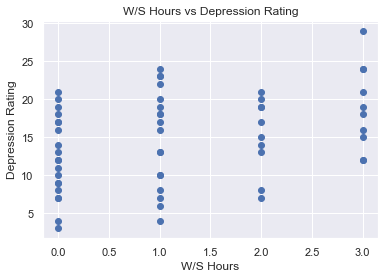

In [23]:
x = df[['w/s_hours']]
y = df[['depre_rating']]
  
plt.scatter(x, y)
plt.xlabel("W/S Hours")  # add X-axis label
plt.ylabel("Depression Rating")  # add Y-axis label
plt.title("W/S Hours vs Depression Rating")  # add title
plt.show()

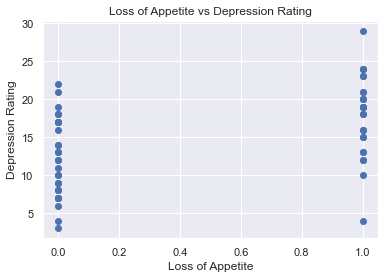

In [24]:
x = df[['app_loss']]
y = df[['depre_rating']]
  
plt.scatter(x, y)
plt.xlabel("Loss of Appetite")  # add X-axis label
plt.ylabel("Depression Rating")  # add Y-axis label
plt.title("Loss of Appetite vs Depression Rating")  # add title
plt.show()

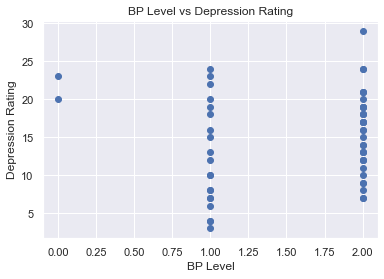

In [25]:
x = df[['bp_level']]
y = df[['depre_rating']]
  
plt.scatter(x, y)
plt.xlabel("BP Level")  # add X-axis label
plt.ylabel("Depression Rating")  # add Y-axis label
plt.title("BP Level vs Depression Rating")  # add title
plt.show()

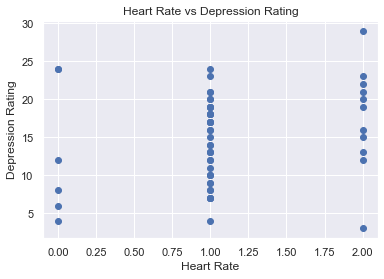

In [26]:
x = df[['heart_rate']]
y = df[['depre_rating']]
  
plt.scatter(x, y)
plt.xlabel("Heart Rate")  # add X-axis label
plt.ylabel("Depression Rating")  # add Y-axis label
plt.title("Heart Rate vs Depression Rating")  # add title
plt.show()

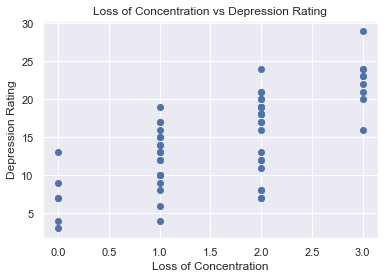

In [27]:
x = df[['con_loss']]
y = df[['depre_rating']]
  
plt.scatter(x, y)
plt.xlabel("Loss of Concentration")  # add X-axis label
plt.ylabel("Depression Rating")  # add Y-axis label
plt.title("Loss of Concentration vs Depression Rating")  # add title
plt.show()

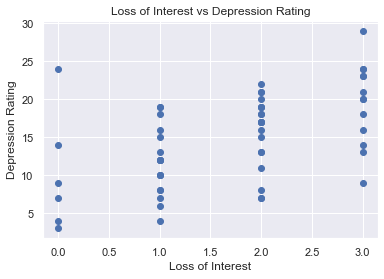

In [28]:
x = df[['less_interest']]
y = df[['depre_rating']]
  
plt.scatter(x, y)
plt.xlabel("Loss of Interest")  # add X-axis label
plt.ylabel("Depression Rating")  # add Y-axis label
plt.title("Loss of Interest vs Depression Rating")  # add title
plt.show()

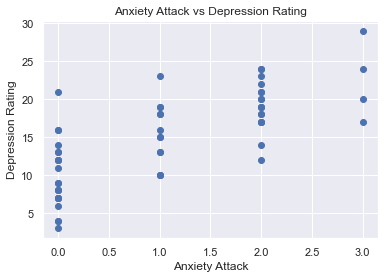

In [29]:
x = df[['anxiety']]
y = df[['depre_rating']]
  
plt.scatter(x, y)
plt.xlabel("Anxiety Attack")  # add X-axis label
plt.ylabel("Depression Rating")  # add Y-axis label
plt.title("Anxiety Attack vs Depression Rating")  # add title
plt.show()

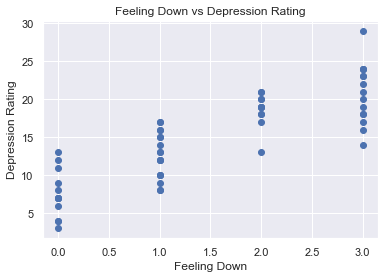

In [30]:
x = df[['feelin_down']]
y = df[['depre_rating']]
  
plt.scatter(x, y)
plt.xlabel("Feeling Down")  # add X-axis label
plt.ylabel("Depression Rating")  # add Y-axis label
plt.title("Feeling Down vs Depression Rating")  # add title
plt.show()

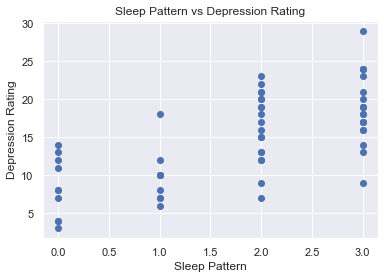

In [31]:
x = df[['sleep_pattern']]
y = df[['depre_rating']]
  
plt.scatter(x, y)
plt.xlabel("Sleep Pattern")  # add X-axis label
plt.ylabel("Depression Rating")  # add Y-axis label
plt.title("Sleep Pattern vs Depression Rating")  # add title
plt.show()

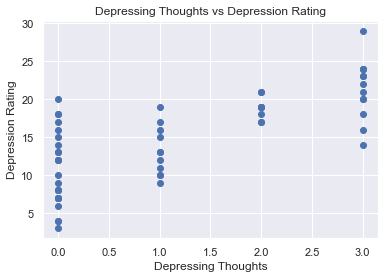

In [32]:
x = df[['thoughts']]
y = df[['depre_rating']]
  
plt.scatter(x, y)
plt.xlabel("Depressing Thoughts")  # add X-axis label
plt.ylabel("Depression Rating")  # add Y-axis label
plt.title("Depressing Thoughts vs Depression Rating")  # add title
plt.show()

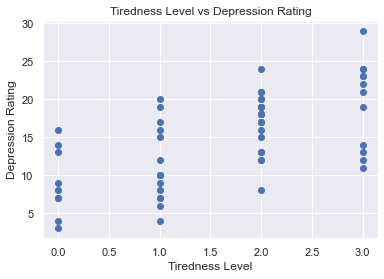

In [33]:
x = df[['tired']]
y = df[['depre_rating']]
  
plt.scatter(x, y)
plt.xlabel("Tiredness Level")  # add X-axis label
plt.ylabel("Depression Rating")  # add Y-axis label
plt.title("Tiredness Level vs Depression Rating")  # add title
plt.show()

# Implementation - Linear Regression

In [34]:
from sklearn import datasets, linear_model, metrics

# Sleep Pattern vs Depression Rating

In [35]:
X_2=df[['sleep_pattern']]
y=df[['depre_rating']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y, test_size=0.3,random_state=1)

In [36]:
reg2 = linear_model.LinearRegression(normalize = True)
reg2.fit(X_train2, y_train2)
predict=reg2.predict(X_test2)
print('Variance score: {}'.format(reg2.score(X_test2, y_test2)))

Variance score: 0.4452673102829716


C:\Users\User\opencv\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [37]:
print(predict)


[[ 7.87184874]
 [15.29621849]
 [15.29621849]
 [11.58403361]
 [11.58403361]
 [ 7.87184874]
 [15.29621849]
 [19.00840336]
 [19.00840336]
 [19.00840336]
 [19.00840336]
 [11.58403361]
 [15.29621849]
 [ 7.87184874]
 [19.00840336]
 [15.29621849]
 [11.58403361]
 [15.29621849]]


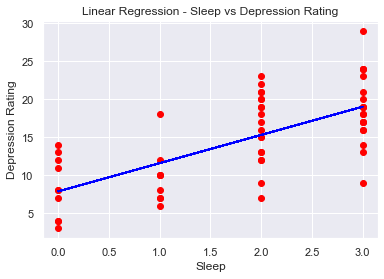

In [38]:
import matplotlib.pyplot as plt
plt.scatter(X_2, y, color='red')
plt.plot(X_2, reg2.predict(X_2), color='blue')
plt.title('Linear Regression - Sleep vs Depression Rating')
plt.xlabel('Sleep')
plt.ylabel('Depression Rating')
plt.show()

In [39]:
reg2.coef_

array([[3.71218487]])

In [40]:
X_3=df.iloc[:,2:13].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3, y, test_size=0.3,random_state=1)

In [41]:
reg3 = linear_model.LinearRegression(normalize = True)
reg3.fit(X_train3, y_train3)
predict=reg3.predict(X_test3)
print('Variance score: {}'.format(reg3.score(X_test3, y_test3)))

Variance score: 1.0


C:\Users\User\opencv\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [42]:
reg3.coef_

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

# Implementation - Polynomial Regression 

# All Features vs Depression Rating

In [43]:
from sklearn.preprocessing import PolynomialFeatures

X_p=df.iloc[:,2:13].values
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y, test_size=0.3,random_state=1)

from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
degree=11
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,linear_model.LinearRegression())
polyreg_scaled.fit(X_train_p,y_train_p)

pred=polyreg_scaled.predict(X_test_p)
print('Variance score: {}'.format(polyreg_scaled.score(X_test_p,y_test_p)))

Variance score: -3.084351446426888


In [44]:
print(y_test_p)

    depre_rating
28            14
2             15
15            20
26             7
19            10
14            12
18            12
19            24
1              9
31            24
24            21
3              8
16            13
20             7
4             24
10            15
30             7
6             22


# Implementation - Logistic Regression

# W/S Hours vs Depression Class

In [45]:
X=df[['w/s_hours']]
y=df[['depression']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
print('Variance score: {}'.format(logReg.score(X_test, y_test)))
logReg.coef_

Variance score: 0.5


C:\Users\User\opencv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.40745943]])

In [48]:
y_pred = logReg.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [49]:
! pip install --upgrade --no-deps statsmodels

In [50]:
! pip install patsy

<AxesSubplot:xlabel='w/s_hours', ylabel='depression'>

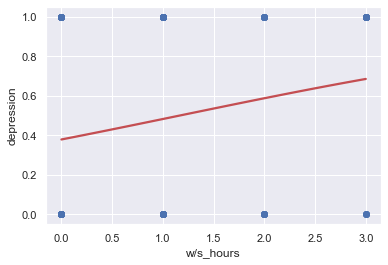

In [51]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.scatter(X, y)
sb.regplot(x=X, y=y, data=df, logistic=True, scatter=None, ci=None, color='r')

# Sleep Pattern vs Depression Class

In [52]:
x1=df[['sleep_pattern']]
y1=df[['depression']]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3)

In [53]:
logReg1 = LogisticRegression()
logReg1.fit(x1_train, y1_train)
print('Variance score: {}'.format(logReg1.score(x1_test, y1_test)))
logReg1.coef_

Variance score: 0.8333333333333334


C:\Users\User\opencv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1.39429723]])

In [54]:
y1_pred = logReg1.predict(x1_test)
y1_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

<AxesSubplot:xlabel='sleep_pattern', ylabel='depression'>

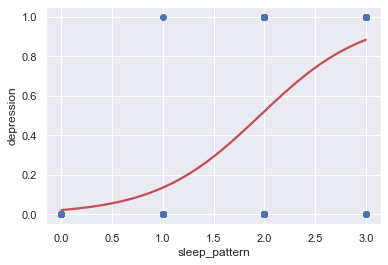

In [55]:
plt.scatter(x1, y1)
sb.regplot(x=x1, y=y1, data=df, logistic=True, scatter=None, ci=None, color='r')

# All Features vs Depression Class

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df.head()

,gender,age,w/s_hours,app_loss,bp_level,heart_rate,con_loss,less_interest,anxiety,feelin_down,sleep_pattern,thoughts,tired,depre_rating,depression
0,2,20,3,1,2,2,3,3,3,3,3,3,3,29,1
1,0,20,1,0,1,1,0,0,0,0,0,0,1,4,0
2,0,21,2,1,1,2,1,2,1,1,2,1,1,15,0
3,2,21,1,0,1,0,1,1,0,1,1,0,2,8,0
4,0,20,2,1,2,2,2,2,2,2,2,2,2,21,1


In [57]:
x3=df[['gender','age','w/s_hours','sleep_pattern','app_loss','heart_rate','con_loss','less_interest','feelin_down','thoughts','tired','bp_level']]
y3=df[['depression']]

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3)

In [58]:
logReg4 = LogisticRegression()
logReg4.fit(x3_train, y3_train)
print('Variance score: {}'.format(logReg4.score(x3_test, y3_test)))
logReg4.coef_

Variance score: 0.9444444444444444


C:\Users\User\opencv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-0.13205963,  0.12112064,  0.59663172,  0.93396934,  0.07827836,
         0.12269353,  1.12794579,  0.62952175,  1.04621394,  1.10231136,
         0.24861704,  0.25626816]])

In [59]:
y_pred= logReg4.predict(x3_test)
print(y3_test)

    depression
4            1
0            1
7            1
1            0
7            1
17           1
34           0
11           1
37           0
5            0
4            1
32           0
3            0
8            1
36           1
29           1
10           1
31           1


In [60]:
print("Precision:", metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Precision: 0.23076923076923078
Recall: 0.6
F1 Score: 0.33333333333333337


# Implementation - SVM

# All Features vs Depression Class

In [61]:
Y=df['depression']
X=df[['gender','age','w/s_hours','sleep_pattern','app_loss','heart_rate','con_loss','less_interest','feelin_down','thoughts','tired','bp_level']]

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4,random_state=109)
clf= SVC(kernel='linear').fit(X_train,y_train)

In [62]:
y_pred= clf.predict(X_test)

In [63]:
y_test

3     0
0     0
30    0
10    0
14    0
21    1
5     1
19    1
20    0
14    0
10    1
6     1
8     1
12    0
18    1
17    0
24    1
9     1
7     1
27    1
4     1
19    0
29    1
37    0
Name: depression, dtype: int64

In [64]:
metrics.accuracy_score(y_test,y_pred)

0.875

In [65]:
print("Precision:", metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Precision: 1.0
Recall: 0.7692307692307693
F1 Score: 0.8695652173913044
